<a href="https://colab.research.google.com/github/SalvadorRdR/IAC-2022/blob/main/Modelo_IGRF_13_IAC2022_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerias

In [ ]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


In [ ]:
!git clone https://github.com/klaundal/ppigrf.git #Hacemos la clonacion de la libreria PPIGRF

Cloning into 'ppigrf'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 65 (delta 36), reused 34 (delta 14), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
import ppigrf

#Data

In [ ]:
from datetime import datetime
h   = 600       # kilometers above sea level
date = datetime(2014, 8, 17) #El dia del estudio

Los intervalos de la latitus y longitud que se quiere simular
$$Slice (Lat_{min} , Lat_{max} +dy ,dy) $$
$$Slice (Lon_{min} , Lon_{max} +dx ,dx) $$

In [ ]:
#Y-->Latitud
#X-->Longitud
dx, dy = 0.1, 0.1                  # Resolución de cada punto, 
Lat, Lon = np.mgrid[slice(-55, 17 + dy, dy), # Se crea un espacio 2D con puntos, de separación dx y dy
                slice(-105, 16 + dx, dx)]

In [ ]:
Be, Bn, Bu = ppigrf.igrf(Lon,Lat, h, date)

In [ ]:
Bt=np.sqrt(Be**2+Bn**2+Bu**2) #Sacamos el modulo de Bt de cada punto

##Plot

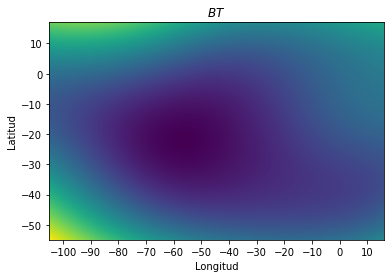

In [ ]:

plt.pcolormesh(Lon, Lat,np.squeeze(Bt))
plt.xticks(range(-100,20,10))
plt.title('$BT $')
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)

plt.show()

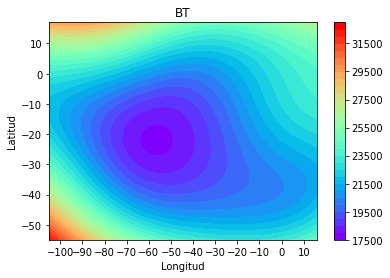

In [ ]:

Bt=np.squeeze(Bt)
levels = MaxNLocator(nbins=30).tick_values(Bt.min(), Bt.max())
cmap = plt.get_cmap('rainbow')                             # Tipo de mapa
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)  # Incluimos las valores para el borde del gráfico

fig, ax = plt.subplots()

im = ax.pcolormesh(Lon, Lat, Bt, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title('BT')
plt.xticks(range(-100,20,10))
plt.xlabel("Longitud", size = 10)
plt.ylabel("Latitud", size = 10)
plt.show()

In [ ]:
Lon.shape,Lat.shape, Bt.shape

((721, 1211), (721, 1211), (721, 1211))

#Date Frame

In [ ]:
df = pd.DataFrame(Bt,index=Lat[:,0],columns=Lon[0,:]) #Donde cada "y" representa el valor de cada posicion de la Latitud y el "x" representa cada valor de la Longitud.... [Lat,Lon]=Campo magentico(Btij) en ese punto 
print('DataFrame:')
print(df)

DataFrame:
             -105.0        -104.9        -104.8        -104.7        -104.6  \
-55.0  32631.010493  32609.790836  32588.568163  32567.342588  32546.114225   
-54.9  32593.646443  32572.403581  32551.157656  32529.908783  32508.657078   
-54.8  32556.293287  32535.027512  32513.758629  32492.486753  32471.211999   
-54.7  32518.951544  32497.663152  32476.371606  32455.077021  32433.779513   
-54.6  32481.621730  32460.311017  32438.997104  32417.680105  32396.360137   
...             ...           ...           ...           ...           ...   
 16.6  29085.794982  29090.487456  29095.148705  29099.778532  29104.376739   
 16.7  29129.378640  29134.096210  29138.782422  29143.437078  29148.059981   
 16.8  29173.017759  29177.760296  29182.471341  29187.150698  29191.798169   
 16.9  29216.711568  29221.478942  29226.214692  29230.918621  29235.590531   
 17.0  29260.459296  29265.251378  29270.011704  29274.740076  29279.436297   

             -104.5        -104.4       

In [ ]:
df.to_csv('MagneticField_T.csv',sep='\t')
!cp data.csv "drive"

cp: cannot stat 'data.csv': No such file or directory


In [ ]:
file_name='modelo-igrf13-ctic.xlsx'
df.to_excel(file_name)

In [1]:
!git clone --depth 1 https://github.com/matplotlib/basemap.git

Cloning into 'basemap'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 325 (delta 56), reused 149 (delta 28), pack-reused 0
Receiving objects: 100% (325/325), 123.65 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Checking out files: 100% (310/310), done.


In [1]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


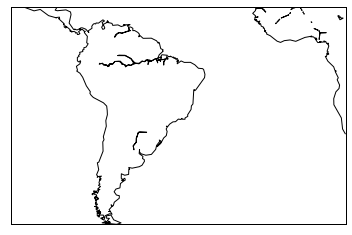

In [38]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='mill',llcrnrlat=-55,urcrnrlat=17,\
            llcrnrlon=-105,urcrnrlon=16,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='white',lake_color='white')
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='white')
#plt.title("Miller Cylindrical Projection")

plt.show()

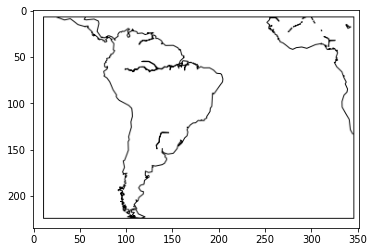

In [39]:
import cv2
image_1 = cv2.imread('mapa2.png')
plt.imshow(image_1)

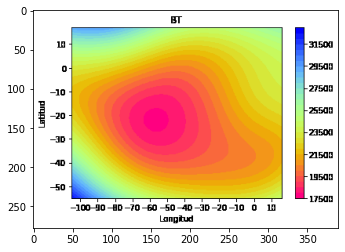

In [35]:
image_2 = cv2.imread('mapa1.png')
plt.imshow(image_2)

In [36]:
image_1.shape

(235, 352, 3)

In [37]:
image_2.shape

(278, 390, 3)

In [ ]:
parte_image_1=imagen_1[]